# Contextual Word Embeddings

Como hemos visto, algoritmos como word2vec, GloVe o fastText aprenden a calcular de manera no supervisada representaciones continuas de palabras o de segmentos de palabras. Sin embargo, estas representaciones son estáticas y no tienen en cuenta los distintos significados que una misma palabra pueda tener.

Y el lenguaje natural está repleto de ambigüedades, a varios niveles, y existen fenómenos como la **polisemia** y la **homografía**, que implican que una misma cadena de caracteres pueda tener más de un significado.

- *banco*: de sentar, de crédito, de peces, de arena
- *cubo*: de agua, operación matemática, figura geométrica
- *planta*: arbusto, fábrica, del pie
- *bajo*: nombre, adjetivo, preposición

¿No sería más lógicp asignar diferentes embeddigs teniendo en cuenta los distintos significados?

## ELMo: Embeddings from Language Models

![](../img/elmo.gif)

[ELMo](https://allennlp.org/elmo) (Peters et al., 2018) es una nueva técnica del [Allen Institue for AI](https://allennlp.org/) para calcular y asignar vectores de palabras de manera dinámica. ELMo procesa la oración de entrada completa y utiliza dos redes neuronales de tipo LSTM bidireccionales para calcular el embedding de cada palabra atendiendo tanto a su contexto anterior como posterior.

Las representaciones que proporcina ELMo son:

- contextuales: la representación de la palabra depende del contexto de uso
- profundas: combinan la información de varias capas de las LSTM
- basadas en caracteres

El [entrenamiento de ELMo](https://jalammar.github.io/illustrated-bert/#elmo-context-matters) consiste en entrenar las redes neuronales para predecir cuál es la siguiente palabra atendiendo a una secuencia de palabras, lo que da como resultado un **modelo de lenguaje**. 

![](../img/elmo-training-lm.png)



In [1]:
from flair.data import Sentence
from flair.embeddings import ELMoEmbeddings

# init embedding
vectorizer = ELMoEmbeddings("small")

In [2]:
# create a sentence
sentence = Sentence("The grass of my backyard is green.")

# embed words in sentence
vectorizer.embed(sentence)

for token in sentence:
    print(token)
    print(token.embedding.shape)    

Token: 1 The
torch.Size([768])
Token: 2 grass
torch.Size([768])
Token: 3 of
torch.Size([768])
Token: 4 my
torch.Size([768])
Token: 5 backyard
torch.Size([768])
Token: 6 is
torch.Size([768])
Token: 7 green.
torch.Size([768])


In [3]:
print(token.embedding)

tensor([ 1.6606e-02,  7.5520e-01, -7.7605e-01, -1.0791e+00, -2.8273e-01,
        -2.0459e+00, -4.2279e-01, -1.6099e+00, -1.1057e+00,  7.4563e-02,
        -4.2388e-02,  1.0190e+00, -1.0276e+00,  9.1539e-01,  2.8064e-01,
         6.5423e-01,  1.1907e-01, -2.8120e-01, -1.0971e+00,  9.9315e-01,
         8.9839e-01, -1.6393e+00, -7.8819e-01,  1.5196e+00,  1.1673e+00,
         2.0779e+00,  3.7563e-01,  1.0348e+00, -7.0916e-01, -1.1761e+00,
         1.0162e+00, -1.5066e+00, -1.3568e-01, -2.9788e-01,  5.4068e-01,
        -4.7304e-01,  1.4542e-02,  2.5410e-01, -9.8394e-01, -1.0382e+00,
        -1.9017e+00,  3.3875e-01, -1.1373e+00, -6.8593e-01, -4.4742e-01,
        -2.3079e-01,  1.4138e+00,  1.1357e+00,  1.7514e+00, -8.2770e-01,
        -5.0497e-02, -2.2452e-01, -7.6329e-01,  1.6686e+00, -4.3314e-01,
        -9.3304e-01, -1.7233e+00,  4.3276e-01, -2.6542e-03,  9.2423e-01,
        -6.9861e-01,  1.5356e+00,  4.5903e-01, -1.1683e-01, -3.2010e-02,
         4.1490e-01,  8.3858e-01, -9.7579e-01,  9.8

In [4]:
from flair.data import Sentence
from flair.embeddings import FlairEmbeddings, StackedEmbeddings

# init Flair embeddings
flair_forward_embedding = FlairEmbeddings("multi-forward")
flair_backward_embedding = FlairEmbeddings("multi-backward")

# now create the StackedEmbedding object that combines all embeddings
stacked_embeddings = StackedEmbeddings(
    embeddings=[flair_forward_embedding, flair_backward_embedding]
)

sentence = Sentence("The grass of my backyard is green.")

# just embed a sentence using the StackedEmbedding as you would with any single embedding.
stacked_embeddings.embed(sentence)

# now check out the embedded tokens.
for token in sentence:
    print(token)
    print(token.embedding.shape)

Token: 1 The
torch.Size([4096])
Token: 2 grass
torch.Size([4096])
Token: 3 of
torch.Size([4096])
Token: 4 my
torch.Size([4096])
Token: 5 backyard
torch.Size([4096])
Token: 6 is
torch.Size([4096])
Token: 7 green.
torch.Size([4096])


In [5]:
token.embedding

tensor([-3.4747e-02, -2.9276e-02,  6.9817e-06,  ..., -1.4460e-03,
        -4.1155e-03,  1.2135e-01], device='cuda:0')

## ULMFiT: Universal Language Model Fine-tuning for Text Classification

[ULMFit](http://nlp.fast.ai/classification/2018/05/15/introducing-ulmfit.html), de [fast.ai](https://docs.fast.ai/), es otro de los modelos de lenguaje preentrenados que ha revolucionado el mundo del NLP al permitir implementar de manera muy sencilla técnicas de *transfer learning*.



**¿Qué es el _Transfer Learning_?**

La técnica de ML que consiste no en entrenar un modelo desde cero, sino en usar modelos generalistas pre-entrenados con grandes colecciones de datos y ajustarlos (haciendo *fine tuning*) para resolver una tarea concreta, usando muchos menos datos. 

Este tipo de técnicas se venían utilizando desde hace unos años en el mundo de la visión artificial y con la llegada de ULMFiT se popularizaron también tareas de procesamiento del lenguaje. [NLP's ImageNet moment has arrived](https://ruder.io/nlp-imagenet/), de Sebastian Ruder, es lectura imprescindible.

Es un proceso **semi-supervisado** que se descompone en dos etapas: 

1. parte no supervisada para pre-entrenar un modelo de lenguaje generalista
2. parte supervisada para ajustar el modelo a una tarea concreta (p. ej. clasificación de texto)

En concreto, ULMFiT consiste una red recurrente bidireccional de tipo LSTM (*multi-layer bi-LSTM*) y utilizan algunas novedosas estrategias como:

- *discriminative fine tuning*: durante la etapa de ajuste, en cada capa se aplica un tasa de aprendizaje diferente. Cada capa captura disinto tipo de información y no tiene sentido que las tasa de aprendizaje sea homogénea durante todo el proceso.

- *slanted triangular learning rates (STLR)*: la tasa de aprendizaje se incrementa linealmente para luego descender (_short increase_ -> _long decay_).

- *gradual unfreezing*: durante la etapa de entrenamiento para la tarea de clasificación, se van descongelando las distintas capas empezando por la última y de manera gradual.

In [6]:
!wget -O ../data/question_topic.csv https://raw.githubusercontent.com/sambit9238/Machine-Learning/master/question_topic.csv

--2020-02-08 15:45:38--  https://raw.githubusercontent.com/sambit9238/Machine-Learning/master/question_topic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 923583 (902K) [text/plain]
Saving to: ‘../data/question_topic.csv’

../data/question_to 100%[===================>] 901.94K  --.-KB/s    in 0.03s   

2020-02-08 15:45:38 (29.7 MB/s) - ‘../data/question_topic.csv’ saved [923583/923583]



In [7]:
import fastai
from fastai.text import *

import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("../data/question_topic.csv")
train, val = train_test_split(df.sample(200))
train.head(10)

,Unnamed: 0,question_text,question_topic
1120,1120,I was wondering if the Corneliani trousers(Sty...,Product Specifications
4960,4960,Do you know if your stores typically have a de...,Omnichannel
2292,2292,If I were to order the Automatic Brow Pencil D...,Omnichannel
3346,3346,Do you know what the main difference between t...,Product Comparison
3870,3870,Do you know if there's a Macys store in Saraso...,Omnichannel
3538,3538,Which jacket is lighter- the Columbia rain jac...,Product Comparison
3240,3240,Im interested in both the Elegant Bicolor Rose...,Product Comparison
3533,3533,What kind of material lines this pin tuck skir...,Product Specifications
2005,2005,I was wondering if your stores have some kitch...,Omnichannel
4452,4452,I need a new filing cabinet. Do you have any i...,Product Availability


In [8]:
# create a language model data bunch
data_lm = TextLMDataBunch.from_df(
    ".", train, val, text_cols="question_text", label_cols="question_topic"
)

In [9]:
data_lm.show_batch()

idx,text
0,"xxmaj if i were to order the xxmaj xxunk xxmaj xxunk xxmaj xxunk xxmaj xxunk from you online , but xxunk wanted to make a return , could i take it back to your store on xxunk xxmaj main xxmaj xxunk in xxmaj xxunk , xxup xxunk ? i was n't sure if that was xxunk . xxbos xxmaj do you know what the main difference between the xxmaj nook"
1,"'s a xxmaj xxunk store in xxmaj xxunk , xxup fl ? xxmaj do your stores usually have xxunk i could see in person ? xxbos xxmaj which jacket is lighter- the xxmaj xxunk xxunk jacket ( xxunk ) or the xxmaj vineyard xxunk ( xxunk ) ? xxmaj do you know if both are the same length ? xxbos i m interested in both the xxmaj elegant xxmaj xxunk"
2,"can both of these be xxunk xxunk when xxunk xxunk ? i would also like yellow xxunk , so is that an option for either of these ? xxbos xxmaj what kind of material xxunk this xxunk xxunk skirt ( xxunk ) ? xxmaj what 's the approximate length of this skirt ? xxbos i was wondering if your stores have some xxunk xxunk like xxunk and xxunk i could"
3,xxbos i need a new filing cabinet . xxmaj do you have any in black to match my office ? xxmaj do you have any small xxup xxunk xxunk xxunk ? xxbos i 'm kind of a xxunk xxunk so i was wondering if you know of any promo codes i can use to buy a xxunk from you ? xxbos i m looking at the xxmaj xxunk xxmaj of
4,"brush included ? xxmaj also , is the case xxunk included with the purchase ? xxbos xxmaj do you know the dimensions of the xxmaj xxunk xxmaj xxunk bag # xxunk ? xxbos i 'm looking to possibly order a xxunk xxunk supplement ( xxup sku # : xxunk ) but if i decide not to xxunk it after getting it , would it be possible to return for a"


## BERT: Bidirectional Encoder Representations from Transformers

A finales de 2018, [Google Research presentó BERT](https://github.com/google-research/bert), un nuevo modelo de lenguaje basado en [Transformers](http://www.peterbloem.nl/blog/transformers).

![bert.jpg](../img/bert.jpg)

En los meses anteriores se había popularizado en el mundo del Deep Learning un método llamado *Attention*, por los buenísimos resultados que había cosechado en los sistemas de traducción automática. BERT está basado en una nueva arquitectura de DL llamada **Transformer**, que incorpora este mismo mecanismo de *self-attention* para entrenar redes neuronales más rápidamente.

¿Qué otras características novedosas tiene [BERT](https://github.com/google-research/bert#what-is-bert)?

- Es bidireccional: para generar representaciones de cada palabra se tiene en cuenta tanto el contexto anterior como el posterior. Y no combina dos modelos, uno de izquierda a derecha y otro en sentido contrario. Lo hace de una sola vez.
- Para ello utiliza *masking* en algunos tokens y procesa la oración completa.
- Es capaz de aprender relaciones entre oraciones, porque además de predecir las palabras enmascaradas aprende a predecir las siguiente oración. 

Hay varias maneras de acceder a los modelos de BERT pero mis favoritas son:

- [bert as service](https://github.com/hanxiao/bert-as-service), de Tencent.
- [transformers](https://github.com/huggingface/transformers), de Hugging Face 🤗
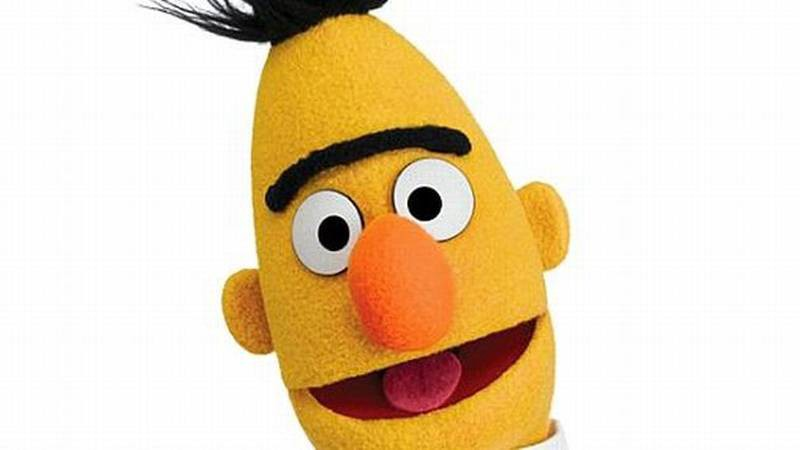

In [10]:
import torch
from transformers import BertModel, BertTokenizer

MODEL_NAME = "bert-base-cased"
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = BertModel.from_pretrained(MODEL_NAME)

text = "All results on the paper were fine-tuned on a single Cloud TPU."
token_ids = tokenizer.encode(text, add_special_tokens=True)
tokens = tokenizer.convert_ids_to_tokens(token_ids, skip_special_tokens=False)

print(tokens)

['[CLS]', 'All', 'results', 'on', 'the', 'paper', 'were', 'fine', '-', 'tuned', 'on', 'a', 'single', 'Cloud', 'T', '##P', '##U', '.', '[SEP]']


In [11]:
input_ids = torch.tensor([token_ids])

with torch.no_grad():
    last_hidden_states = model(input_ids)[0]

embedding = torch.mean(last_hidden_states, 1)

print(last_hidden_states.shape)
print(embedding.shape)
print(embedding)

torch.Size([1, 19, 768])
torch.Size([1, 768])
tensor([[ 4.4163e-01,  5.8422e-02,  1.1946e-01, -1.8031e-01,  1.1388e-02,
         -8.2559e-02,  3.9325e-02,  1.3530e-01, -6.1596e-02,  1.5442e-02,
         -4.2820e-02,  2.9808e-02, -3.2356e-01,  2.7820e-01, -4.1276e-01,
         -1.1658e-01,  2.5146e-01,  1.9457e-01,  5.0206e-02, -4.4770e-02,
         -8.1117e-02,  2.0753e-02, -1.8020e-01, -2.3929e-01,  8.3760e-02,
         -1.7777e-01,  3.4856e-01,  2.8665e-01, -2.4643e-01,  1.1700e-01,
         -1.7115e-01,  1.2558e-01,  1.6205e-01, -1.2502e-01,  1.3458e-03,
          2.6725e-01, -2.1077e-02,  1.2992e-01,  2.0528e-02,  2.1124e-01,
          9.6128e-02,  3.5650e-02,  3.9275e-02, -3.1401e-02,  4.2724e-01,
         -4.6763e-01, -4.1802e-03,  1.2663e-01, -4.1207e-01,  1.7302e-01,
         -6.7888e-02,  9.2613e-02, -9.6752e-02,  4.3245e-01,  6.6522e-02,
         -6.6467e-02, -1.8157e-01, -3.1009e-02,  5.5475e-02, -1.0225e-01,
          1.6121e-01, -4.2238e-03,  4.0913e-01,  2.3229e-01,  1.21

In [12]:
import torch
from transformers import AutoModelWithLMHead, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")
model = AutoModelWithLMHead.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")

text = "El columnista analiza las elecciones irlandesas"
token_ids = tokenizer.encode(text, add_special_tokens=True)
tokens = tokenizer.convert_ids_to_tokens(token_ids, skip_special_tokens=False)

print(tokens)

['[CLS]', 'El', 'colum', '##nist', '##a', 'analiza', 'las', 'elecciones', 'irlandesa', '##s', '[SEP]']


In [13]:
input_ids = torch.tensor([token_ids])

with torch.no_grad():
    last_hidden_states = model(input_ids)[0]

embedding = torch.mean(last_hidden_states, 1)

print(last_hidden_states.shape)
print(embedding.shape)
print(embedding)

torch.Size([1, 11, 31002])
torch.Size([1, 31002])
tensor([[-10.4347,  -6.4371,  -4.2830,  ...,  -0.6191,  -4.3811,   0.2589]])


## Ejercicio: Crea embeddings

In [14]:
import numpy as np
import torch
from transformers import BertModel, BertTokenizer

MODEL_NAME = "bert-base-cased"
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = BertModel.from_pretrained(MODEL_NAME)

def embed(text: str) -> torch.Tensor:
    token_ids = tokenizer.encode(text, add_special_tokens=True)
    tokens = tokenizer.convert_ids_to_tokens(token_ids, skip_special_tokens=False)
    input_ids = torch.tensor([token_ids])

    with torch.no_grad():
        last_hidden_states = model(input_ids)[0]

    embedding = torch.mean(last_hidden_states, 1)
    return embedding[0].numpy()

In [15]:
embedding = embed("Hello, my friend!")
embedding.shape

(768,)

In [16]:
def knn_search(text: str, k: int = 3) -> None:
    """Búsqueda basada en vecinos cercanos (KNN)"""
    text_vec = embed(text)
    score = np.sum(text_vec * doc_embeddings, axis=1) / np.linalg.norm(doc_embeddings, axis=1)
    topk_idx = np.argsort(score)[::-1][:k]
    for idx in topk_idx:
        print(f"{texts[idx]} -> {score[idx]}")

In [17]:
texts = [
    "Pizza and pasta are my favorite food!", 
    "I hate football", 
    "I have a blue Toyota Corolla.", 
    "I enjoy playing tennis.",
    "I love ice-cream :-)",
    "Green colorless ideas sleep furiously.",
    "Relations between Washington and Beijing have been tense for years.",
    "Chinese officials have criticized the United States.",
    "U.S. Women's Team Qualifies for Olympic Soccer Tournament"
]

doc_embeddings = [embed(t) for t in texts]

In [18]:
knn_search("I own a reliable Japanese car")

I have a blue Toyota Corolla. -> 8.926820755004883
I enjoy playing tennis. -> 8.817132949829102
I love ice-cream :-) -> 8.147653579711914


In [19]:
knn_search("I love sports")

I hate football -> 10.35401439666748
I enjoy playing tennis. -> 10.283246994018555
I love ice-cream :-) -> 8.12734317779541


In [22]:
import pandas as pd

df = pd.read_csv("../data/question_topic.csv")
texts = list(set(df["question_text"]))[:1000]
doc_embeddings = [embed(t) for t in texts]

In [23]:
knn_search("I'd like to cancel of my order")

I may want to get a new office chair from your website but if I don't like it in person, would I be able to return it for a Wayfair gift card? -> 9.230982780456543
I'm considering ordering a new suitcase from your site. Do you have a promo code I could use on one? -> 9.160245895385742
I may want to get a new office chair from your website but if I don't like it in person, would I be able to return it for a Pottery Barn gift card? -> 9.122479438781738


## Y más allá

Cada día aparecen nuevos [modelos de lenguaje basados en BERT pre-entrenados en una lengua específica](https://twitter.com/seb_ruder/status/1221851361811128321).

![](../img/specific-bert-models.png)

Y modelos de lenguaje basados en otras arquitecturas. No es fácil seguir el ritmo.

![](../img/lm-family.jpg)

## Otras Referencias

- [The Illustrated BERT, ELMo, and co. (How NLP Cracked Transfer Learning)](https://jalammar.github.io/illustrated-bert/)
- [The Illustrated Transformer](https://jalammar.github.io/illustrated-transformer/)
- [Transfer Learning in NLP](https://medium.com/explorations-in-language-and-learning/transfer-learning-in-nlp-2d09c3dfaeb6)
- [Transfer Learning in NLP for Tweet Stance Classification](https://towardsdatascience.com/transfer-learning-in-nlp-for-tweet-stance-classification-8ab014da8dde)